In [568]:
import numpy as np
import pandas as pd
import statistics
import re
from xml.etree import ElementTree
from ast import literal_eval
import matplotlib.pyplot as plt
from collections import defaultdict


In [344]:
%matplotlib inline

# Helper Methods

In [345]:
# https://www.geeksforgeeks.org/python-difference-two-lists/
    
def Diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [346]:
def years_avg_diff(lst1, lst2):
    if len(lst1) == 0 or len(lst2) == 0: return 0
    dif = statistics.mean(lst1) - statistics.mean(lst2)
    if dif == 0: return 0
    else: return abs(dif)

In [347]:
def is_same_name(n1,n2):
    if n1==n2: return True
    if (len(n1) == len(n2)): return False
    if (len(n1) > len(n2)): return n1[1:] == n2
    else: return n1 == n2[1:]
    
    # WHAT IF last name is 2-characters? 

In [348]:
# Merges same names in a list. i.e. if the name is '李顯謨' (full name) with '顯謨' (first name only)

def merge_same_names(names):
    # For each name, strip of () because some names have them
    stripped_names = [name.strip('()') for name in names]
    
    # Merge absolutely similar names
    unique_names = np.unique(stripped_names).tolist()
    
    # Sort in decreasing length order
    unique_names.sort(key=len)#,reverse=True)
    
    if (len(unique_names) == 1): return unique_names
    
    for i in range(0, len(unique_names)-1):
        if (len(unique_names) == 1): return unique_names
        for j in range(i+1, len(unique_names)):
            if is_same_name(unique_names[i], unique_names[j]):
                unique_names[i] = unique_names[j]
                
    unique_names = np.unique(unique_names).tolist()
    
    return unique_names

In [542]:
# Returns all of the names from the sillok text (paragraph)
# for the given sid (sillok id) and spid (person id MAN...)

def get_names_from_sillok(sid, spid):
    names = set()
    paragraph = sillok_f[sillok_f['sid']==sid].paragraph
    
    if not paragraph.empty:
        paragraph = paragraph.values[0]
        root = ElementTree.fromstring("<tag>" + paragraph + "</tag>")
        for name in root.iter('index'):
            if 'ref' in name.attrib:
                if name.attrib['ref'] == spid: names.add(name.text)
            else: continue
            # TODO LATER: FILL IN: Return all the names without the 'ref' tag
    
    return names


In [ ]:
# sillok_career[sillok_career.spid == "M_0036198"]
sillok_career[sillok_career.sid == "kea_10002019_007"]

In [ ]:
def get_year_for_record(sid, spid, df):
    row = df[df.spid == spid]
    row = row[row.sid == sid]
    if len(row) <= 0:
        print ('Out of Bounds', sid, spid)
        return ("Out of Bounds")
    indx = row.index[0]
#     df.loc[indx,'spid'] = new_spid
    
    lunar_year = row.lunardate.values[0][0:4]
    return lunar_year
    

In [ ]:
def list_diff(li1, li2): 
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
    return li_dif 

In [ ]:
# From https://stackoverflow.com/questions/6078262/ast-literal-eval-support-for-set-literals-in-python-2-7
def to_set(set_str):
    """
    Required to get around the lack of support for sets in ast.literal_eval. 
    It works by converting the string to a list and then to a set.

    Parameters
    ----------
    set_str : str
        A string representation of a set.

    Returns
    -------
    set

    Raises
    ------
    ValueError
        "malformed string" if the string does not start with '{' and and end 
        with '}'.

    """
    set_str = set_str.strip()
    if not (set_str.startswith('{') and set_str.endswith('}')):
        raise ValueError("malformed string")

    olds, news = ['{', '}'] , ['[',']']
    for old, new in zip(olds, news):        
        set_str = set_str.replace(old, new)

    return set(literal_eval(set_str))

# Import Data

## From SQL (only need to do this once)

In [ ]:
USER = 'yennie'
PASSWORD = 'bridge1'
HOST = '143.248.109.150'
DB = 'bridge'
PORT = '33552'

def init():
    if sys.platform == "win32":
        conn = psycopg2.connect(database=DB, user=USER, password=PASSWORD, host='localhost', port=PORT)
        cur = conn.cursor()
    else:
        print("The OS of this machine is " + sys.platform + ". Connecting to remote server...")
        conn = psycopg2.connect(database=DB, user=USER, password=PASSWORD, host=HOST, port=PORT)
        cur = conn.cursor()
    return conn, cur

engine = create_engine('postgresql+psycopg2://{}:{}@{}:{}/{}'.format(USER, PASSWORD, HOST,PORT,DB))
con, cur = init()


In [ ]:
sillok_additional = pd.read_sql('select * from sillok_additional', con=engine)
sillok = pd.read_sql('select * from sillok', con=engine)
sillok_career_full = pd.read_sql('select * from sillok_career full join dates on dates.solardate=sillok_career.solardate', con=engine)
sillok_career = pd.read_sql('select * from sillok_career inner join dates on dates.solardate=sillok_career.solardate', con=engine)
sillok_person = pd.read_sql('select * from sillok_person', con=engine)
gwanjik = pd.read_sql('select * from gwanjik', con=engine)

sillok_people = sillok_career.merge(gwanjik[['gid', 'level']], left_on='gid', right_on='gid', how='left')


In [ ]:
# Save to CSV so I don't need to do again later

sillok.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok.csv')
sillok_additional.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_additional.csv')
sillok_career_full.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_career_full.csv')
sillok_career.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_career.csv')
sillok_person.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_person.csv')
sillok_people.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/sillok_people.csv')


## Load from CSV

In [ ]:
gwanjik

In [ ]:
sillok_career_full = pd.read_csv('../../data/temp/sillok_career_full.csv')
sillok_career = pd.read_csv('../../data/temp/sillok_career.csv')
sillok_person = pd.read_csv('../../data/temp/sillok_person.csv')
sillok = pd.read_csv('../../data/temp/sillok.csv')
sillok.drop(columns='Unnamed: 0', inplace=True)
sillok_additional = pd.read_csv('../../data/temp/sillok_additional.csv')
sillok_additional.drop(columns='Unnamed: 0', inplace=True)
gwanjik = pd.read_csv('../../data/temp/gwanjik.csv')

# Drop one of the extra solardate rows
sillok_people = sillok_career.merge(gwanjik[['gid', 'level']], left_on='gid', right_on='gid', how='left')
sillok_people = sillok_people.loc[:,~sillok_people.columns.duplicated()]



Need to merge the two different sillok versions.
`sillok_additional has some overlap with `sillok` but not all of them overlap, so we need to create a master `sillok`

In [ ]:
len(sillok_additional), len(sillok)

In [ ]:
sillok_additional['sid'] = sillok_additional.url.str.extract(r'id/(.+)')

In [ ]:
# sillok = sillok.merge(sillok_additional, on=['sid'], how='outer')
# len(sillok)

In [ ]:
# Prepare to concat the two sillok versions
# will not merge because that will complicate things

sillok_original = sillok[['sid','title', 'lunardate', 'subject', 'chinese', 'name', 'book', 'paragraph']]

sillok_a = sillok_additional[['sid', 'title', 'date', 'subject', 'chinese', 'person', 'book', 'paragraph']]
sillok_a.rename(columns={'date': 'lunardate', 'name': 'person'}, inplace=True)


In [ ]:
sillok_f = pd.concat([sillok_original, sillok_a])

In [ ]:
len(sillok_f)

# Generate `to_split`

## Visualizing Data With IQR

In [ ]:
# Plot one person
entries = sillok_people.groupby('spid')['rdate'].apply(list)
plt.scatter(entries[0], [1]*len(entries[0]))

In [ ]:
# Entries in which people are mentioned more than one time in the sillok
entries_2 = entries[entries.apply(lambda x: len(x) > 1)]
entries_2.apply(len).value_counts()

In [ ]:
# Find the IQR
entries_iqr = entries_2.apply(stats.iqr)
sorted_iqr = entries_iqr.sort_values()

In [351]:
print(len(sorted_iqr.value_counts()))
sorted_iqr.value_counts()

NameError: name 'sorted_iqr' is not defined

In [ ]:
# Interesting statistics
statistics.mean(sorted_iqr.values), statistics.median(sorted_iqr.values)

In [ ]:
# This means that the IQR for most are reasonable
sorted_iqr.plot.hist(bins=300)

## Find Gwanjik `gid` that does not decrease with increasing `rdate`

In [ ]:
# Returns the number of errors while descending
def getDescendingErrors(lst):
    errorCount = 0
    if len(lst) < 1: return errorCount
    prev = lst[0]
    for item in range(1, len(lst)):
        if prev < lst[item]:
            errorCount += 1
#             return False
        prev = lst[item]
    return errorCount

In [ ]:
to_split = pd.DataFrame([])

for spid in sorted_iqr.index:
#     print(spid)
    
    spid_person = sillok_people[sillok_people['spid']==spid]
    spid_person = spid_person.sort_values(['rdate','level'], ascending=[True, False])
    level_values = spid_person['level'].values
    
    if len(level_values) < 1:
        print(spid, len(level_values))
        continue
    numErrors = getDescendingErrors(level_values)
    errorRate = numErrors/len(level_values)
#     print(numErrors, len(level_values), errorRate)
    
    if numErrors > 0:
        to_split = to_split.append(pd.DataFrame({
            'spid': spid, 
            'numErrors': numErrors, 
            'totalLength': len(level_values),
            'errorRate': [errorRate]}))


In [ ]:
to_split.reset_index(inplace = True, drop=True)
print(len(to_split))
to_split[0:5]

In [ ]:
# To search for a specific person
sillok_people[sillok_people['spid']=='M_0048165']

In [ ]:
# This is what the error rates look like
to_split['errorRate'].sort_values()

In [ ]:
# Visualize the spread of the error rates
errorRates = to_split['errorRate'].values
plt.hist(errorRates, bins=20)


In [ ]:
# See how many of these are 1/2

halfies = to_split[to_split['errorRate'] == 0.5]
print(len(halfies))

# the ones with 1 as numerator
halfies_one = halfies[halfies['numErrors'] == 1]
print(len(halfies_one))

# and the ones with 2 as denominator
print(len(halfies_one[halfies_one['totalLength'] == 2]))

In [ ]:
# Save to DF!
to_split.to_csv('/home/yenniejun/code/JoseonMunkwa/data/temp/to_split.csv')

# Get unique names

In [ ]:
# Load from CSV
to_split = pd.read_csv('../../data/temp/to_split.csv')
to_split.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
# total_sid_values = 0
# for ref in to_split['spid'].values:
#     sid_values = sillok_career_full[sillok_career_full['spid'] == ref]['sid'].values
#     total_sid_values += len(sid_values)

# The above takes a lot of time to generate so I just saved the value here
# This is the number of unique records for each sid (sillok) and spid (person) pair
total_sid_values = 290991

In [ ]:
# Get all of the unique names for each distinct record in the sillok
# Each of these records, I grab each unique instance of people's names being mentioned
# I merge the same names based on the rule that 'first name' and 'full name' are the same person

def get_unique_names_df():
    unique_names_for_spid = pd.DataFrame(columns=['sid', 'spid', 'unique_names', 'names'], index=range(total_sid_values))

    i = 0
    for ref in to_split['spid'].values:
        sid_values = sillok_career_full[sillok_career_full['spid'] == ref]['sid'].values

        distinct_names = set()
        for val in sid_values:
            # Get that sillok entry
            sillok_f[sillok_f['sid']==val]
            names = get_names_from_sillok(val, ref)

            if len(names) <= 1:
                unique_names = names
            else:
                unique_names = merge_same_names(names)

            row = {'sid':val, 'spid':ref, 'unique_names': unique_names, 'names': names}
            unique_names_for_spid.loc[i] = row
            i += 1

            if (len(names) > 1):
                print(i, len(names), len(unique_names))
    return unique_names_for_spid

In [ ]:
# Note: Generating this takes a long time because I have to scrape the ENTIRE sillok

# unique_names_for_spid = get_unique_names_df()


In [ ]:
unique_names_for_spid.to_csv('../../data/temp/unique_names_for_spid.csv')



In [ ]:
unique_names_for_spid.head()

# Split the Names

In [1127]:
unique_names_for_spid = pd.read_csv('../../data/temp/unique_names_for_spid.csv')
to_split = pd.read_csv('../../data/temp/to_split.csv')
total_sid_values = 290991

In [1128]:
splitty = to_split.sort_values(by=['errorRate'], ascending=[False])
splitty = splitty[splitty['totalLength'] > 3]


In [1129]:
splitty[:]

,Unnamed: 0,spid,numErrors,totalLength,errorRate
1996,0,M_0019075,3,5,0.600000
1124,0,M_0015793,3,5,0.600000
3339,0,M_0002587,3,5,0.600000
7568,0,M_0014623,7,13,0.538462
505,0,M_0024330,2,4,0.500000
...,...,...,...,...,...
880,0,M_0003828,1,77,0.012987
5793,0,M_0006412,1,88,0.011364
716,0,M_0000991,1,104,0.009615
3433,0,M_0010674,1,106,0.009434


In [1130]:
len(splitty['spid'].values)

7164

In [1211]:
split_people = pd.DataFrame(columns=[
    'spid', 'old_official_name', 'old_sids', 'old_years',
    'new_names', 'new_sids', 'new_years', 'alpha'],
                            index=range(total_sid_values))

other_split_cases = pd.DataFrame(columns=[
    'spid', 'old_official_name', 'old_sids', 'old_years', 
    'new_names', 'new_sids','new_years','alpha'], 
                                         index=range(total_sid_values))
officials_with_no_names = []

weird_error_cases = []

out_of_bounds = []

In [1214]:
i = 0
j = 0
k = 0
ALPHA = 3

splitty = to_split.sort_values(by=['errorRate'], ascending=[False])
splitty = splitty[splitty['totalLength'] > 3]

print('splitty length by spid:', len(splitty['spid'].values))

num = 0
# for spind in ["M_0010674", 'M_0004794']:
for spid in splitty['spid'].values:
#     spid = 'M_0004794'

    # Find all of the sid this person is mentioned in
    sid_values = sillok_career_full[sillok_career_full['spid'] == spid]['sid'].values
    lunar_years = sillok_career_full[sillok_career_full['spid'] == spid]['lunardate'].values
    lunar_years = [x for x in lunar_years if str(x) != 'nan']
    lunar_years = [int(y[0:4]) for y in lunar_years]
    
    # This is the official name of the person in sillok_person
    official_name = sillok_person[sillok_person['spid']==spid].chnname.values
    official_name = official_name[0].replace('\ufeff',"")
    
    # Special case of people with no official names! Got to keep track of this
    if not official_name:
        officials_with_no_names.append(spid)
    
    # These are the values we are accumulating associated with the official name
    official_years = []
    official_name_sids = []
    
    # These are the values we are accumulating associated with a name different from the official name
    other_names = set()
    other_names_years = []
    other_names_sids = []
    
    print(k,'--------spid------', spid, len(sid_values))
    k += 1

    for sid in sid_values:
        names = get_names_from_sillok(sid, spid)
        names = merge_same_names(names)
        
        # Checking if the official name or first name is in the record line
        if official_name in names or official_name[1:] in names:
            row = sillok_career[sillok_career.spid == spid]
            row = row[row.sid == sid]
            if row.lunardate.values.any():
                official_years.append(int(row.lunardate.values[0][0:4]))
                official_name_sids.append(sid)
            else:
                weird_error_cases.append(spid)
                weird_error_cases.append(sid)
        else:
#             print("Adding new names!!!", sid, spid, official_name, names)
            
            # make a list of this person's names
            for name in names:
                other_names.add(name) 
                
            new_person_year = get_year_for_record(sid, spid, sillok_career)
            
            if (new_person_year != "Out of Bounds"):
                other_names_years.append(int(new_person_year))
                other_names_sids.append(sid)
            else:
                out_of_bounds.append(spid)
                out_of_bounds.append(sid)
            
            
    years_diff = years_avg_diff(other_names_years, official_years)

#     print(len(other_names), print(len(official_name_sids)))
    if ((len(other_names) == 0) ^ (len(official_name_sids) == 0) and len(other_names_sids) > 0):
        row = {'spid':spid, 
               'old_official_name': official_name, 
               'old_sids': official_name_sids,
               'old_years': official_years,
               'new_names': other_names, 
               'new_sids':other_names_sids, 
               'new_years':other_names_years,
               'alpha': years_diff}
        other_split_cases.loc[j] = row
        j += 1
        continue

    # Different names AND the years are too far apart
    else:
        print(years_diff, spid, other_names, official_name, other_names_years, lunar_years)
        row = {'spid':spid, 
               'old_official_name': official_name, 
               'old_sids': official_name_sids, 
               'old_years':official_years, 
               'new_names': other_names, 
               'new_sids': other_names_sids,
               'new_years':other_names_years, 
               'alpha':years_diff}
        split_people.loc[i] = row
        i += 1




splitty length by spid: 7164
0 --------spid------ M_0019075 5
1 --------spid------ M_0015793 5
2 --------spid------ M_0002587 5
3 --------spid------ M_0014623 13
4 --------spid------ M_0024330 4
5 --------spid------ M_0019091 4
6 --------spid------ M_0022416 4
7 --------spid------ M_0010813 4
8 --------spid------ M_0047436 4
9 --------spid------ M_0058776 4
10 --------spid------ M_0049770 6
11 --------spid------ M_0037755 4
12 --------spid------ M_0013751 4
13 --------spid------ M_0010649 4
14 --------spid------ M_0051948 6
15 --------spid------ M_0014326 4
16 --------spid------ M_0006256 4
17 --------spid------ M_0056085 4
18 --------spid------ M_0015887 6
19 --------spid------ M_0012592 4
20 --------spid------ M_0008856 4
21 --------spid------ M_0009878 4
22 --------spid------ M_0056051 4
23 --------spid------ M_0063300 4
24 --------spid------ M_0004912 8
25 --------spid------ M_0036843 4
26 --------spid------ M_0002613 4
27 --------spid------ M_0024480 6
28 --------spid------ M_0058

235 --------spid------ M_0000699 6
236 --------spid------ M_0006757 9
237 --------spid------ M_0054680 12
238 --------spid------ M_0041171 6
239 --------spid------ M_0000946 15
240 --------spid------ M_0059377 9
241 --------spid------ M_0026398 6
242 --------spid------ M_0018907 9
243 --------spid------ M_0049168 6
244 --------spid------ M_0028751 6
245 --------spid------ M_0004853 9
246 --------spid------ M_0004904 6
247 --------spid------ M_0005362 45
248 --------spid------ M_0002938 6
249 --------spid------ M_0023282 9
250 --------spid------ M_0045466 6
251 --------spid------ M_0012055 12
252 --------spid------ M_0002363 12
253 --------spid------ M_0004546 9
254 --------spid------ M_0049259 21
255 --------spid------ M_0005880 15
256 --------spid------ M_0013090 6
257 --------spid------ M_0026763 6
258 --------spid------ M_0009204 12
259 --------spid------ M_0023401 9
260 --------spid------ M_0003385 6
261 --------spid------ M_0002836 18
262 --------spid------ M_0062780 9
263 -------

466 --------spid------ M_0005461 22
467 --------spid------ M_0005611 11
468 --------spid------ M_0022373 11
469 --------spid------ M_0000241 44
470 --------spid------ M_0027006 11
471 --------spid------ M_0009811 11
472 --------spid------ M_0027931 11
473 --------spid------ M_0055962 11
474 --------spid------ M_0042778 11
475 --------spid------ M_0003571 11
476 --------spid------ M_0004698 11
477 --------spid------ M_0002766 22
478 --------spid------ M_0002703 22
479 --------spid------ M_0061660 11
480 --------spid------ M_0035691 11
481 --------spid------ M_0002388 11
482 --------spid------ M_0013167 11
483 --------spid------ M_0005138 22
484 --------spid------ M_0002384 11
485 --------spid------ M_0000710 11
486 --------spid------ M_0001903 11
487 --------spid------ M_0059395 22
488 --------spid------ M_0034912 11
489 --------spid------ M_0023453 11
490 --------spid------ M_0041210 22
491 --------spid------ M_0008434 11
492 --------spid------ M_0004447 22
493 --------spid------ M_000

697 --------spid------ M_0005382 4
698 --------spid------ M_0009957 4
699 --------spid------ M_0010150 12
700 --------spid------ M_0015847 4
701 --------spid------ M_0006439 4
702 --------spid------ M_0000059 4
703 --------spid------ M_0047786 12
704 --------spid------ M_0012887 4
705 --------spid------ M_0000011 8
706 --------spid------ M_0060796 4
707 --------spid------ M_0054281 4
708 --------spid------ M_0011653 4
709 --------spid------ M_0026717 4
710 --------spid------ M_0008673 20
711 --------spid------ M_0054544 4
712 --------spid------ M_0058338 4
713 --------spid------ M_0042302 4
714 --------spid------ M_0019079 4
715 --------spid------ M_0035080 4
716 --------spid------ M_0015776 4
717 --------spid------ M_0048351 4
718 --------spid------ M_0009940 4
719 --------spid------ M_0000267 12
720 --------spid------ M_0006224 4
721 --------spid------ M_0022610 4
722 --------spid------ M_0052920 4
723 --------spid------ M_0000074 4
724 --------spid------ M_0023426 4
725 --------spid

931 --------spid------ M_0046188 4
932 --------spid------ M_0026661 4
933 --------spid------ M_0019141 4
934 --------spid------ M_0058083 8
935 --------spid------ M_0024013 4
936 --------spid------ M_0006222 12
937 --------spid------ M_0054664 4
938 --------spid------ M_0001694 4
939 --------spid------ M_0068250 4
940 --------spid------ M_0010213 4
941 --------spid------ M_0026499 4
942 --------spid------ M_0062423 4
943 --------spid------ M_0036228 4
944 --------spid------ M_0045058 4
945 --------spid------ M_0039105 4
946 --------spid------ M_0001771 4
947 --------spid------ M_0001083 4
948 --------spid------ M_0010716 4
949 --------spid------ M_0052229 4
950 --------spid------ M_0004304 24
951 --------spid------ M_0056463 4
952 --------spid------ M_0039883 4
953 --------spid------ M_0038129 8
954 --------spid------ M_0021310 4
955 --------spid------ M_0014503 8
956 --------spid------ M_0046552 4
957 --------spid------ M_0038480 4
958 --------spid------ M_0043099 16
959 --------spid-

1159 --------spid------ M_0006385 17
1160 --------spid------ M_0004620 17
1161 --------spid------ M_0054922 17
1162 --------spid------ M_0001870 17
1163 --------spid------ M_0027229 34
1164 --------spid------ M_0064940 17
1165 --------spid------ M_0010796 17
1166 --------spid------ M_0005378 34
1167 --------spid------ M_0041008 17
1168 --------spid------ M_0000580 34
1169 --------spid------ M_0016016 17
1170 --------spid------ M_0044976 17
1171 --------spid------ M_0001450 64
1172 --------spid------ M_0005360 47
1173 --------spid------ M_0002879 47
1174 --------spid------ M_0021118 47
1175 --------spid------ M_0063000 47
1176 --------spid------ M_0004843 107
1177 --------spid------ M_0019024 30
1178 --------spid------ M_0001635 30
1179 --------spid------ M_0001019 43
1180 --------spid------ M_0004663 69
1181 --------spid------ M_0008381 13
1182 --------spid------ M_0009288 52
1183 --------spid------ M_0003691 13
1184 --------spid------ M_0003550 13
1185 --------spid------ M_0002123 26


1383 --------spid------ M_0003483 23
1384 --------spid------ M_0002174 23
1385 --------spid------ M_0001426 46
1386 --------spid------ M_0006182 83
1387 --------spid------ M_0006495 60
1388 --------spid------ M_0004044 60
1389 --------spid------ M_0003473 97
1390 --------spid------ M_0004350 37
1391 --------spid------ M_0002175 37
1392 --------spid------ M_0005779 190
1393 --------spid------ M_0006017 51
1394 --------spid------ M_0004925 65
1395 --------spid------ M_0004544 42
1396 --------spid------ M_0005093 14
1397 --------spid------ M_0019527 14
1398 --------spid------ M_0022708 14
1399 --------spid------ M_0020472 14
1400 --------spid------ M_0000804 14
1401 --------spid------ M_0004861 14
1402 --------spid------ M_0003639 14
1403 --------spid------ M_0002787 56
1404 --------spid------ M_0022976 14
1405 --------spid------ M_0005402 14
1406 --------spid------ M_0008593 14
1407 --------spid------ M_0025894 28
1408 --------spid------ M_0000995 14
1409 --------spid------ M_0016532 14


1606 --------spid------ M_0024040 35
1607 --------spid------ M_0003351 15
1608 --------spid------ M_0042595 5
1609 --------spid------ M_0053874 5
1610 --------spid------ M_0058195 10
1611 --------spid------ M_0028091 10
1612 --------spid------ M_0065540 5
1613 --------spid------ M_0008954 5
1614 --------spid------ M_0008853 5
1615 --------spid------ M_0004892 5
1616 --------spid------ M_0000961 15
1617 --------spid------ M_0010889 5
1618 --------spid------ M_0027313 5
1619 --------spid------ M_0041904 5
1620 --------spid------ M_0003893 5
1621 --------spid------ M_0056263 5
1622 --------spid------ M_0016029 25
1623 --------spid------ M_0063009 15
1624 --------spid------ M_0021877 5
1625 --------spid------ M_0009989 5
1626 --------spid------ M_0024044 5
1627 --------spid------ M_0010977 5
1628 --------spid------ M_0039035 5
1629 --------spid------ M_0002307 15
1630 --------spid------ M_0046258 5
1631 --------spid------ M_0034450 5
1632 --------spid------ M_0051678 5
1633 --------spid---

1832 --------spid------ M_0002400 5
1833 --------spid------ M_0010701 5
1834 --------spid------ M_0046570 20
1835 --------spid------ M_0024393 5
1836 --------spid------ M_0000117 55
1837 --------spid------ M_0054981 10
1838 --------spid------ M_0002510 5
1839 --------spid------ M_0006130 5
1840 --------spid------ M_0028440 5
1841 --------spid------ M_0004937 5
1842 --------spid------ M_0056165 10
1843 --------spid------ M_0027252 5
1844 --------spid------ M_0001375 5
1845 --------spid------ M_0052706 5
1846 --------spid------ M_0024715 5
1847 --------spid------ M_0058189 5
1848 --------spid------ M_0002953 10
1849 --------spid------ M_0027506 5
1850 --------spid------ M_0060954 5
1851 --------spid------ M_0026480 5
1852 --------spid------ M_0002869 5
1853 --------spid------ M_0020012 5
1854 --------spid------ M_0023512 5
1855 --------spid------ M_0063868 5
1856 --------spid------ M_0058324 15
1857 --------spid------ M_0010400 5
1858 --------spid------ M_0024749 5
1859 --------spid-----

2057 --------spid------ M_0005119 120
2058 --------spid------ M_0015606 47
2059 --------spid------ M_0014360 47
2060 --------spid------ M_0001740 94
2061 --------spid------ M_0005118 126
2062 --------spid------ M_0036261 21
2063 --------spid------ M_0006000 42
2064 --------spid------ M_0001324 42
2065 --------spid------ M_0023783 21
2066 --------spid------ M_0000669 21
2067 --------spid------ M_0003874 21
2068 --------spid------ M_0009916 21
2069 --------spid------ M_0004211 63
2070 --------spid------ M_0015039 21
2071 --------spid------ M_0003716 21
2072 --------spid------ M_0006319 21
2073 --------spid------ M_0011815 21
2074 --------spid------ M_0004339 84
2075 --------spid------ M_0001973 121
2076 --------spid------ M_0022862 121
2077 --------spid------ M_0002822 100
2078 --------spid------ M_0002159 79
2079 --------spid------ M_0035846 79
2080 --------spid------ M_0000394 79
2081 --------spid------ M_0018298 58
2082 --------spid------ M_0022597 37
2083 --------spid------ M_0004455

2278 --------spid------ M_0003000 122
2279 --------spid------ M_0001879 161
2280 --------spid------ M_0004895 100
2281 --------spid------ M_0003046 100
2282 --------spid------ M_0004907 39
2283 --------spid------ M_0005613 39
2284 --------spid------ M_0038442 39
2285 --------spid------ M_0001712 39
2286 --------spid------ M_0004958 106
2287 --------spid------ M_0001593 212
2288 --------spid------ M_0002356 67
2289 --------spid------ M_0041668 95
2290 --------spid------ M_0002673 28
2291 --------spid------ M_0005831 28
2292 --------spid------ M_0003412 56
2293 --------spid------ M_0004018 56
2294 --------spid------ M_0002640 28
2295 --------spid------ M_0051747 28
2296 --------spid------ M_0005585 28
2297 --------spid------ M_0005398 28
2298 --------spid------ M_0006497 28
2299 --------spid------ M_0033368 28
2300 --------spid------ M_0001464 28
2301 --------spid------ M_0010168 28
2302 --------spid------ M_0002359 28
2303 --------spid------ M_0063594 28
2304 --------spid------ M_001873

2500 --------spid------ M_0034458 6
2501 --------spid------ M_0050751 12
2502 --------spid------ M_0008793 6
2503 --------spid------ M_0027823 6
2504 --------spid------ M_0005858 12
2505 --------spid------ M_0024526 6
2506 --------spid------ M_0001366 6
2507 --------spid------ M_0050034 6
2508 --------spid------ M_0000858 6
2509 --------spid------ M_0027822 6
2510 --------spid------ M_0048570 6
2511 --------spid------ M_0064189 6
2512 --------spid------ M_0059483 6
2513 --------spid------ M_0003082 6
2514 --------spid------ M_0002006 12
2515 --------spid------ M_0005097 6
2516 --------spid------ M_0000985 6
2517 --------spid------ M_0024076 6
2518 --------spid------ M_0009886 6
2519 --------spid------ M_0028126 6
2520 --------spid------ M_0004130 6
2521 --------spid------ M_0005009 60
2522 --------spid------ M_0003564 6
2523 --------spid------ M_0057779 6
2524 --------spid------ M_0038109 6
2525 --------spid------ M_0064340 6
2526 --------spid------ M_0012761 12
2527 --------spid------

2726 --------spid------ M_0055918 6
2727 --------spid------ M_0005452 12
2728 --------spid------ M_0051445 6
2729 --------spid------ M_0044359 6
2730 --------spid------ M_0010021 6
2731 --------spid------ M_0022255 6
2732 --------spid------ M_0002219 6
2733 --------spid------ M_0049993 6
2734 --------spid------ M_0054527 6
2735 --------spid------ M_0001521 12
2736 --------spid------ M_0020541 30
2737 --------spid------ M_0040541 6
2738 --------spid------ M_0002994 12
2739 --------spid------ M_0058186 12
2740 --------spid------ M_0021586 36
2741 --------spid------ M_0000022 18
2742 --------spid------ M_0061459 42
2743 --------spid------ M_0061618 6
2744 --------spid------ M_0002681 6
2745 --------spid------ M_0027119 6
2746 --------spid------ M_0027637 6
2747 --------spid------ M_0011152 18
2748 --------spid------ M_0015958 6
2749 --------spid------ M_0060244 6
2750 --------spid------ M_0027330 6
2751 --------spid------ M_0026753 6
2752 --------spid------ M_0010152 6
2753 --------spid--

2950 --------spid------ M_0005319 44
2951 --------spid------ M_0006273 189
2952 --------spid------ M_0006210 63
2953 --------spid------ M_0002195 126
2954 --------spid------ M_0023220 63
2955 --------spid------ M_0046705 101
2956 --------spid------ M_0049793 19
2957 --------spid------ M_0004882 38
2958 --------spid------ M_0063094 19
2959 --------spid------ M_0067661 19
2960 --------spid------ M_0006366 19
2961 --------spid------ M_0020120 19
2962 --------spid------ M_0000368 38
2963 --------spid------ M_0005335 19
2964 --------spid------ M_0016080 19
2965 --------spid------ M_0019575 19
2966 --------spid------ M_0052844 19
2967 --------spid------ M_0003963 95
2968 --------spid------ M_0002827 38
2969 --------spid------ M_0059583 19
2970 --------spid------ M_0023948 38
2971 --------spid------ M_0002802 38
2972 --------spid------ M_0003066 19
2973 --------spid------ M_0003193 19
2974 --------spid------ M_0006233 38
2975 --------spid------ M_0005607 19
2976 --------spid------ M_0046434 1

3171 --------spid------ M_0045351 20
3172 --------spid------ M_0049069 60
3173 --------spid------ M_0000640 20
3174 --------spid------ M_0001246 40
3175 --------spid------ M_0042357 20
3176 --------spid------ M_0000091 20
3177 --------spid------ M_0004353 20
3178 --------spid------ M_0065322 20
3179 --------spid------ M_0000341 20
3180 --------spid------ M_0001619 20
3181 --------spid------ M_0006065 80
3182 --------spid------ M_0002829 194
3183 --------spid------ M_0004946 174
3184 --------spid------ M_0003812 87
3185 --------spid------ M_0003587 67
3186 --------spid------ M_0004665 268
3187 --------spid------ M_0061930 47
3188 --------spid------ M_0006086 47
3189 --------spid------ M_0035081 47
3190 --------spid------ M_0006244 47
3191 --------spid------ M_0013352 47
3192 --------spid------ M_0004394 168
3193 --------spid------ M_0004188 121
3194 --------spid------ M_0002562 74
3195 --------spid------ M_0003972 128
3196 --------spid------ M_0001223 27
3197 --------spid------ M_000850

3394 --------spid------ M_0014529 7
3395 --------spid------ M_0023208 35
3396 --------spid------ M_0018475 7
3397 --------spid------ M_0038173 35
3398 --------spid------ M_0026372 7
3399 --------spid------ M_0058911 14
3400 --------spid------ M_0014775 7
3401 --------spid------ M_0026894 7
3402 --------spid------ M_0000033 14
3403 --------spid------ M_0005688 7
3404 --------spid------ M_0020361 7
3405 --------spid------ M_0003484 7
3406 --------spid------ M_0001935 7
3407 --------spid------ M_0013336 7
3408 --------spid------ M_0000940 35
3409 --------spid------ M_0060075 7
3410 --------spid------ M_0002133 7
3411 --------spid------ M_0038216 7
3412 --------spid------ M_0005373 28
3413 --------spid------ M_0001000 7
3414 --------spid------ M_0006243 7
3415 --------spid------ M_0035408 7
3416 --------spid------ M_0005266 14
3417 --------spid------ M_0055295 7
3418 --------spid------ M_0006279 21
3419 --------spid------ M_0010042 7
3420 --------spid------ M_0016056 7
3421 --------spid---

3619 --------spid------ M_0005631 57
3620 --------spid------ M_0004625 57
3621 --------spid------ M_0006605 107
3622 --------spid------ M_0005042 50
3623 --------spid------ M_0001714 50
3624 --------spid------ M_0021758 50
3625 --------spid------ M_0005224 50
3626 --------spid------ M_0000564 50
3627 --------spid------ M_0001093 193
3628 --------spid------ M_0023440 43
3629 --------spid------ M_0006534 43
3630 --------spid------ M_0021842 43
3631 --------spid------ M_0003159 43
3632 --------spid------ M_0005989 86
3633 --------spid------ M_0005485 43
3634 --------spid------ M_0006687 215
3635 --------spid------ M_0046498 79
3636 --------spid------ M_0005256 115
3637 --------spid------ M_0002241 36
3638 --------spid------ M_0003208 36
3639 --------spid------ M_0062995 36
3640 --------spid------ M_0001555 36
3641 --------spid------ M_0002584 36
3642 --------spid------ M_0049557 36
3643 --------spid------ M_0039568 36
3644 --------spid------ M_0024618 72
3645 --------spid------ M_0006557 

3840 --------spid------ M_0021926 15
3841 --------spid------ M_0002823 15
3842 --------spid------ M_0035636 218
3843 --------spid------ M_0005397 68
3844 --------spid------ M_0003500 189
3845 --------spid------ M_0005424 53
3846 --------spid------ M_0005692 53
3847 --------spid------ M_0004754 38
3848 --------spid------ M_0061621 38
3849 --------spid------ M_0000673 114
3850 --------spid------ M_0002260 114
3851 --------spid------ M_0003793 76
3852 --------spid------ M_0066663 76
3853 --------spid------ M_0002131 38
3854 --------spid------ M_0002959 38
3855 --------spid------ M_0014319 38
3856 --------spid------ M_0002284 38
3857 --------spid------ M_0005323 76
3858 --------spid------ M_0003359 76
3859 --------spid------ M_0019313 38
3860 --------spid------ M_0000957 38
3861 --------spid------ M_0005229 61
3862 --------spid------ M_0004587 61
3863 --------spid------ M_0037910 61
3864 --------spid------ M_0004941 61
3865 --------spid------ M_0000694 122
3866 --------spid------ M_0005907

4063 --------spid------ M_0005114 16
4064 --------spid------ M_0022724 16
4065 --------spid------ M_0014852 8
4066 --------spid------ M_0002268 8
4067 --------spid------ M_0026439 8
4068 --------spid------ M_0004224 32
4069 --------spid------ M_0026400 8
4070 --------spid------ M_0006551 8
4071 --------spid------ M_0001336 16
4072 --------spid------ M_0006332 16
4073 --------spid------ M_0026740 8
4074 --------spid------ M_0024351 8
4075 --------spid------ M_0000579 40
4076 --------spid------ M_0048814 8
4077 --------spid------ M_0016484 8
4078 --------spid------ M_0064472 24
4079 --------spid------ M_0051312 16
4080 --------spid------ M_0048229 8
4081 --------spid------ M_0027844 8
4082 --------spid------ M_0006543 8
4083 --------spid------ M_0042621 24
4084 --------spid------ M_0000243 24
4085 --------spid------ M_0044482 8
4086 --------spid------ M_0002250 8
4087 --------spid------ M_0004414 8
4088 --------spid------ M_0026595 8
4089 --------spid------ M_0059885 24
4090 --------spid

4288 --------spid------ M_0003585 33
4289 --------spid------ M_0025431 33
4290 --------spid------ M_0041796 66
4291 --------spid------ M_0003458 33
4292 --------spid------ M_0001663 99
4293 --------spid------ M_0019647 58
4294 --------spid------ M_0006280 58
4295 --------spid------ M_0020592 116
4296 --------spid------ M_0001739 83
4297 --------spid------ M_0005439 83
4298 --------spid------ M_0000015 183
4299 --------spid------ M_0013931 25
4300 --------spid------ M_0000130 25
4301 --------spid------ M_0002206 25
4302 --------spid------ M_0003674 25
4303 --------spid------ M_0040974 25
4304 --------spid------ M_0046281 25
4305 --------spid------ M_0001654 25
4306 --------spid------ M_0003360 225
4307 --------spid------ M_0000251 25
4308 --------spid------ M_0004036 50
4309 --------spid------ M_0023347 25
4310 --------spid------ M_0005648 50
4311 --------spid------ M_0001982 25
4312 --------spid------ M_0002930 50
4313 --------spid------ M_0001606 100
4314 --------spid------ M_0000287 

4509 --------spid------ M_0005667 9
4510 --------spid------ M_0035635 9
4511 --------spid------ M_0031606 18
4512 --------spid------ M_0003376 9
4513 --------spid------ M_0005477 9
4514 --------spid------ M_0057761 9
4515 --------spid------ M_0046721 36
4516 --------spid------ M_0002223 18
4517 --------spid------ M_0004485 27
4518 --------spid------ M_0060087 9
4519 --------spid------ M_0005016 9
4520 --------spid------ M_0002477 45
4521 --------spid------ M_0049973 9
4522 --------spid------ M_0003291 18
4523 --------spid------ M_0061295 9
4524 --------spid------ M_0002535 9
4525 --------spid------ M_0001158 18
4526 --------spid------ M_0006162 9
4527 --------spid------ M_0001738 63
4528 --------spid------ M_0052240 18
4529 --------spid------ M_0000778 18
4530 --------spid------ M_0005175 9
4531 --------spid------ M_0005020 27
4532 --------spid------ M_0004581 36
4533 --------spid------ M_0010203 18
4534 --------spid------ M_0000068 9
4535 --------spid------ M_0002398 9
4536 --------sp

4734 --------spid------ M_0003068 55
4735 --------spid------ M_0000416 55
4736 --------spid------ M_0064297 55
4737 --------spid------ M_0061334 110
4738 --------spid------ M_0021902 55
4739 --------spid------ M_0011852 55
4740 --------spid------ M_0002546 55
4741 --------spid------ M_0006057 101
4742 --------spid------ M_0003080 202
4743 --------spid------ M_0050526 46
4744 --------spid------ M_0001090 46
4745 --------spid------ M_0005426 46
4746 --------spid------ M_0004568 46
4747 --------spid------ M_0063603 46
4748 --------spid------ M_0019740 46
4749 --------spid------ M_0019220 92
4750 --------spid------ M_0020659 83
4751 --------spid------ M_0060556 203
4752 --------spid------ M_0003406 120
4753 --------spid------ M_0035686 120
4754 --------spid------ M_0003724 37
4755 --------spid------ M_0005753 74
4756 --------spid------ M_0001869 37
4757 --------spid------ M_0003848 37
4758 --------spid------ M_0001374 37
4759 --------spid------ M_0004962 148
4760 --------spid------ M_00028

4955 --------spid------ M_0023518 10
4956 --------spid------ M_0001368 30
4957 --------spid------ M_0009976 20
4958 --------spid------ M_0063084 20
4959 --------spid------ M_0056259 20
4960 --------spid------ M_0004921 20
4961 --------spid------ M_0026266 10
4962 --------spid------ M_0000956 10
4963 --------spid------ M_0023853 40
4964 --------spid------ M_0013874 10
4965 --------spid------ M_0004931 10
4966 --------spid------ M_0001576 10
4967 --------spid------ M_0001896 30
4968 --------spid------ M_0003103 20
4969 --------spid------ M_0037201 20
4970 --------spid------ M_0000745 10
4971 --------spid------ M_0005916 10
4972 --------spid------ M_0044801 20
4973 --------spid------ M_0021554 50
4974 --------spid------ M_0004235 10
4975 --------spid------ M_0059985 30
4976 --------spid------ M_0067751 10
4977 --------spid------ M_0003323 10
4978 --------spid------ M_0058421 10
4979 --------spid------ M_0061467 10
4980 --------spid------ M_0019725 10
4981 --------spid------ M_0006315 10
4

5177 --------spid------ M_0004742 145
5178 --------spid------ M_0004238 145
5179 --------spid------ M_0003659 145
5180 --------spid------ M_0006056 166
5181 --------spid------ M_0049430 187
5182 --------spid------ M_0003707 52
5183 --------spid------ M_0004134 52
5184 --------spid------ M_0002984 52
5185 --------spid------ M_0004092 52
5186 --------spid------ M_0002889 52
5187 --------spid------ M_0065758 52
5188 --------spid------ M_0061406 52
5189 --------spid------ M_0004131 52
5190 --------spid------ M_0005751 177
5191 --------spid------ M_0002115 302
5192 --------spid------ M_0006061 125
5193 --------spid------ M_0063578 73
5194 --------spid------ M_0006191 73
5195 --------spid------ M_0000467 73
5196 --------spid------ M_0064840 73
5197 --------spid------ M_0006415 73
5198 --------spid------ M_0058741 94
5199 --------spid------ M_0001546 115
5200 --------spid------ M_0060955 21
5201 --------spid------ M_0004988 21
5202 --------spid------ M_0002845 21
5203 --------spid------ M_001

5398 --------spid------ M_0009608 11
5399 --------spid------ M_0002334 11
5400 --------spid------ M_0002083 88
5401 --------spid------ M_0060239 66
5402 --------spid------ M_0000439 33
5403 --------spid------ M_0021238 22
5404 --------spid------ M_0019908 22
5405 --------spid------ M_0006119 11
5406 --------spid------ M_0002915 11
5407 --------spid------ M_0061995 11
5408 --------spid------ M_0026900 11
5409 --------spid------ M_0021903 22
5410 --------spid------ M_0001624 11
5411 --------spid------ M_0027205 22
5412 --------spid------ M_0028864 11
5413 --------spid------ M_0003891 22
5414 --------spid------ M_0023010 11
5415 --------spid------ M_0009027 33
5416 --------spid------ M_0046309 22
5417 --------spid------ M_0000270 11
5418 --------spid------ M_0037938 44
5419 --------spid------ M_0037808 11
5420 --------spid------ M_0006122 22
5421 --------spid------ M_0003051 22
5422 --------spid------ M_0005844 11
5423 --------spid------ M_0003618 44
5424 --------spid------ M_0048079 11
5

5619 --------spid------ M_0004822 24
5620 --------spid------ M_0000543 72
5621 --------spid------ M_0005347 12
5622 --------spid------ M_0003436 12
5623 --------spid------ M_0004789 12
5624 --------spid------ M_0003189 72
5625 --------spid------ M_0044235 12
5626 --------spid------ M_0027101 24
5627 --------spid------ M_0000461 48
5628 --------spid------ M_0005734 36
5629 --------spid------ M_0046413 12
5630 --------spid------ M_0002556 12
5631 --------spid------ M_0048286 12
5632 --------spid------ M_0035815 12
5633 --------spid------ M_0006170 36
5634 --------spid------ M_0050106 36
5635 --------spid------ M_0003769 12
5636 --------spid------ M_0001537 12
5637 --------spid------ M_0003534 36
5638 --------spid------ M_0037913 12
5639 --------spid------ M_0024616 12
5640 --------spid------ M_0004008 12
5641 --------spid------ M_0055432 12
5642 --------spid------ M_0006717 12
5643 --------spid------ M_0003288 12
5644 --------spid------ M_0001828 12
5645 --------spid------ M_0001227 24
5

5840 --------spid------ M_0002825 258
5841 --------spid------ M_0061993 142
5842 --------spid------ M_0005559 26
5843 --------spid------ M_0039181 13
5844 --------spid------ M_0001339 13
5845 --------spid------ M_0000730 65
5846 --------spid------ M_0026778 13
5847 --------spid------ M_0000883 13
5848 --------spid------ M_0054318 13
5849 --------spid------ M_0006160 13
5850 --------spid------ M_0006725 13
5851 --------spid------ M_0062937 13
5852 --------spid------ M_0027566 39
5853 --------spid------ M_0005974 13
5854 --------spid------ M_0012374 13
5855 --------spid------ M_0005501 13
5856 --------spid------ M_0008587 13
5857 --------spid------ M_0008037 39
5858 --------spid------ M_0063610 13
5859 --------spid------ M_0004612 13
5860 --------spid------ M_0022565 13
5861 --------spid------ M_0063590 52
5862 --------spid------ M_0000528 13
5863 --------spid------ M_0038630 13
5864 --------spid------ M_0057834 13
5865 --------spid------ M_0003601 13
5866 --------spid------ M_0003556 13

6061 --------spid------ M_0010766 14
6062 --------spid------ M_0035762 28
6063 --------spid------ M_0062228 84
6064 --------spid------ M_0000917 14
6065 --------spid------ M_0060935 14
6066 --------spid------ M_0003116 56
6067 --------spid------ M_0004290 14
6068 --------spid------ M_0005374 14
6069 --------spid------ M_0002638 14
6070 --------spid------ M_0004111 14
6071 --------spid------ M_0004014 14
6072 --------spid------ M_0005488 14
6073 --------spid------ M_0000403 14
6074 --------spid------ M_0005812 98
6075 --------spid------ M_0067116 56
6076 --------spid------ M_0064325 14
6077 --------spid------ M_0002924 14
6078 --------spid------ M_0001961 14
6079 --------spid------ M_0005720 70
6080 --------spid------ M_0035561 28
6081 --------spid------ M_0001321 28
6082 --------spid------ M_0006516 28
6083 --------spid------ M_0005205 14
6084 --------spid------ M_0038934 14
6085 --------spid------ M_0006158 28
6086 --------spid------ M_0009910 14
6087 --------spid------ M_0041803 14
6

6282 --------spid------ M_0063089 15
6283 --------spid------ M_0006644 406
6284 --------spid------ M_0004013 361
6285 --------spid------ M_0002792 181
6286 --------spid------ M_0002242 136
6287 --------spid------ M_0003231 91
6288 --------spid------ M_0000404 76
6289 --------spid------ M_0006758 122
6290 --------spid------ M_0002662 61
6291 --------spid------ M_0005678 61
6292 --------spid------ M_0005782 61
6293 --------spid------ M_0018990 61
6294 --------spid------ M_0054305 122
6295 --------spid------ M_0057453 61
6296 --------spid------ M_0006039 168
6297 --------spid------ M_0002248 214
6298 --------spid------ M_0003548 46
6299 --------spid------ M_0003098 92
6300 --------spid------ M_0006453 46
6301 --------spid------ M_0004632 46
6302 --------spid------ M_0021759 414
6303 --------spid------ M_0006708 46
6304 --------spid------ M_0006712 322
6305 --------spid------ M_0001886 371
6306 --------spid------ M_0004475 294
6307 --------spid------ M_0006090 31
6308 --------spid------ M_

6503 --------spid------ M_0001814 68
6504 --------spid------ M_0035809 17
6505 --------spid------ M_0002119 17
6506 --------spid------ M_0004106 510
6507 --------spid------ M_0004122 17
6508 --------spid------ M_0002203 17
6509 --------spid------ M_0059767 34
6510 --------spid------ M_0006087 17
6511 --------spid------ M_0010428 85
6512 --------spid------ M_0003432 68
6513 --------spid------ M_0003048 34
6514 --------spid------ M_0000076 17
6515 --------spid------ M_0001711 17
6516 --------spid------ M_0011784 17
6517 --------spid------ M_0002500 17
6518 --------spid------ M_0001962 34
6519 --------spid------ M_0006088 17
6520 --------spid------ M_0005617 34
6521 --------spid------ M_0001554 17
6522 --------spid------ M_0002429 34
6523 --------spid------ M_0004282 17
6524 --------spid------ M_0011120 17
6525 --------spid------ M_0005080 17
6526 --------spid------ M_0001967 34
6527 --------spid------ M_0058957 34
6528 --------spid------ M_0003668 51
6529 --------spid------ M_0000111 17


6724 --------spid------ M_0046592 20
6725 --------spid------ M_0006390 20
6726 --------spid------ M_0023218 40
6727 --------spid------ M_0003935 20
6728 --------spid------ M_0000622 20
6729 --------spid------ M_0003434 20
6730 --------spid------ M_0021415 40
6731 --------spid------ M_0011363 20
6732 --------spid------ M_0008589 20
6733 --------spid------ M_0000159 20
6734 --------spid------ M_0000271 20
6735 --------spid------ M_0006710 40
6736 --------spid------ M_0023715 20
6737 --------spid------ M_0000757 40
6738 --------spid------ M_0019310 20
6739 --------spid------ M_0002849 20
6740 --------spid------ M_0054731 20
6741 --------spid------ M_0005454 40
6742 --------spid------ M_0018613 20
6743 --------spid------ M_0004569 20
6744 --------spid------ M_0023194 40
6745 --------spid------ M_0003630 160
6746 --------spid------ M_0005274 302
6747 --------spid------ M_0006115 141
6748 --------spid------ M_0003011 363
6749 --------spid------ M_0001036 81
6750 --------spid------ M_0012288 

6945 --------spid------ M_0003799 25
6946 --------spid------ M_0006441 626
6947 --------spid------ M_0000875 276
6948 --------spid------ M_0002116 506
6949 --------spid------ M_0004573 381
6950 --------spid------ M_0006064 51
6951 --------spid------ M_0001842 895
6952 --------spid------ M_0001338 154
6953 --------spid------ M_0008858 77
6954 --------spid------ M_0002354 439
6955 --------spid------ M_0000210 26
6956 --------spid------ M_0002419 26
6957 --------spid------ M_0064321 26
6958 --------spid------ M_0003127 26
6959 --------spid------ M_0000544 26
6960 --------spid------ M_0005738 26
6961 --------spid------ M_0002416 26
6962 --------spid------ M_0003336 26
6963 --------spid------ M_0031492 26
6964 --------spid------ M_0054776 26
6965 --------spid------ M_0000970 26
6966 --------spid------ M_0046579 26
6967 --------spid------ M_0048523 26
6968 --------spid------ M_0057537 26
6969 --------spid------ M_0058864 52
6970 --------spid------ M_0039845 26
6971 --------spid------ M_00635

In [1215]:
other_split_cases

,spid,old_official_name,old_sids,old_years,new_names,new_sids,new_years,alpha
0,M_0064979,朴,[],[],{朴&#x264FC;},"[kia_10601025_010, kia_11901125_002, kia_12403...","[1475, 1488, 1493, 1493, 1485, 1493, 1488]",0
1,M_0042344,李雲靈,[],[],"{李雲露, 鍾城君}","[kga_11405005_001, kga_11308012_002, kga_11311...","[1468, 1467, 1467, 1467, 1468]",0
2,M_0058652,沈經歷,[],[],{沈思賢},"[kna_12607010_001, kna_12604001_006, kna_12604...","[1593, 1593, 1593, 1600, 1593]",0
3,M_0004183,李基卨,"[koa_10109027_003, kna_13605007_002, kna_13802...","[1609, 1603, 1605, 1608, 1608, 1604, 1609, 1602]",{},[koa_10109027_002],[1609],3
4,M_0041171,李士恭,[],[],{李碩龍},"[kpa_12601006_002, kpa_12408009_002, kpa_12408...","[1648, 1646, 1646, 1646, 1648, 1646]",0
...,...,...,...,...,...,...,...,...
290986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Save split_people and other_split_cases
other_split_cases.dropna(inplace=True)
other_split_cases.to_csv('../../data/temp/other_split_cases.csv')

split_people.dropna(inplace=True)
split_people.to_csv('../../data/temp/split_people.csv')


In [ ]:
 split_people.new_years.apply(lambda x: literal_eval(str(x)))

In [ ]:
# Hooray, these are empty! :D
print(out_of_bounds, officials_with_no_names)

In [ ]:
weird_error_cases

# Look at Split Data

In [353]:

split_people = pd.read_csv('../../data/temp/split_people.csv')

# Clean the data a little
split_people = split_people.drop(columns=["Unnamed: 0"])

# Evaluate the lists in their proper form
split_people['new_years'] = split_people.new_years.apply(lambda x: literal_eval(str(x)))
split_people['old_years'] = split_people.old_years.apply(lambda x: literal_eval(str(x)))


In [354]:
split_people.sort_values('alpha', ascending=False).head()

,spid,old_official_name,old_sids,old_years,new_names,new_sids,new_years,alpha
69,M_0009701,李重,"['kea_10012006_003', 'kga_10404018_003', 'kda_...","[1450, 1458, 1433, 1429, 1430, 1429, 1457, 145...","{'肅獻', '忠正公', '李䆃重'}","['kza_10909024_001', 'kza_10704023_002', 'kza_...","[1872, 1870, 1866, 1866, 1876, 1876, 1875, 1854]",425.075
6,M_0011858,金思,['kia_10501008_002'],[1474],{'金思䄷'},"['kva_11404007_002', 'kva_12003016_001', 'kva_...","[1790, 1796, 1798, 1801, 1787]",320.400
106,M_0047525,朴純,"['krb_11411002_004', 'krb_11401021_003', 'ksa_...","[1673, 1673, 1681, 1673, 1673, 1664, 1676, 166...",{'朴順'},['kca_11001028_007'],[1410],263.520
2,M_0000233,金啓,"['kma_11310006_003', 'kea_10009018_004', 'kna_...","[1558, 1450, 1569, 1558, 1567, 1558, 1441, 157...",{'金啓㾾'},['kwa_10302007_001'],[1803],262.200
110,M_0001134,具人文,"['kea_10010008_001', 'kga_10507013_001', 'kea_...","[1450, 1459, 1450, 1791, 1791, 1793, 1450, 145...",{'具仁文'},['kva_11506005_002'],[1791],237.600


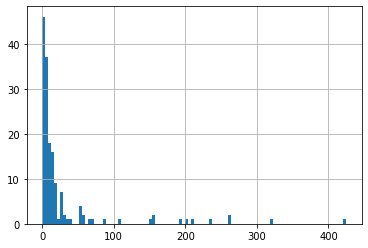

In [355]:
# Plot the alphas
alphas_spread = split_people.alpha
alphas_spread.hist(bins=100)

In [356]:
alphas_spread.describe()

count    159.000000
mean      28.204950
std       62.199034
min        0.000000
25%        3.444444
50%        8.100000
75%       18.251262
max      425.075000
Name: alpha, dtype: float64

In [357]:
# From here: 
# https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [358]:
dude = split_people.loc[split_people.spid=='M_0000195']

In [359]:
dude

,spid,old_official_name,old_sids,old_years,new_names,new_sids,new_years,alpha
0,M_0000195,權䌖,"['kua_10702021_002', 'kua_11308007_003', 'kua_...","[1731, 1737, 1737, 1736, 1735, 1908]","{'權㻩', '權䭲', '權㮐'}","['kka_13607029_004', 'kka_13401003_004', 'kua_...","[1541, 1539, 1745, 1534, 1544, 1544, 1525, 175...",151.0


In [360]:
dude.new_years[0][0]

1541

['M_0000195']
151.0
10 6
['M_0000195']
151.0
10 6
['M_0000195']
151.0
10 6


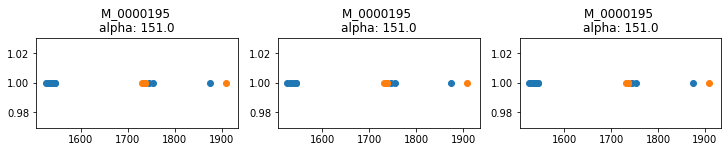

In [361]:
fig1, axs = plt.subplots(1, 3, figsize=(10,2), constrained_layout=True)
axs = trim_axs(axs, 3)

new_years = dude.new_years
old_years = dude.old_years

for ax, case in zip(axs, range(3)):
    new_years = dude.new_years[0]
    old_years = dude.old_years[0]
    print(dude.spid.values)
    print(str(dude.alpha.values[0]))
    ax.set_title(dude.spid.values[0] + " \nalpha: " + str(dude.alpha.values[0]))
    print(len(new_years), len(old_years))
    ax.scatter(new_years, len(new_years) * [1])#dude.old_years.tolist())
    ax.scatter(old_years, len(old_years) * [1])


In [1137]:
cases = len(split_people)

# define the figure size and grid layout properties
figsize = (10, 100)
cols = 3
rows = cases // cols + 1

fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, cases)
for ax, case in zip(axs, range(cases)):
    dude = split_people.loc[case]
    new_years = dude.new_years
    old_years = dude.old_years
    ax.set_title(dude.spid + " \nalpha: " + str(dude.alpha))
    ax.scatter(new_years, len(new_years) * [1])
    ax.scatter(old_years, len(old_years) * [1])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe2299b5560> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.savefig('../../data/temp/split_people_years_plot.pdf')


# Manually split everyone! 

Need to establish some baseline criteria
i.e. a "istwopeople?" if I know or don't know
despite alpha differences, split all
make a separate table that keeps track of what these alphas were

cases: 
* if old_years is empty, that means that we just need to update the official name 
* if new_years is empty, it means this person does not need to be split
* if old_years and new_years are both not empty ... then we will split. Create a new person consisting of the "other" names

* splitting into multiple people. SOMETIMES we will need to split into multiple people because that is how we must partition the different names. in that case ... need new ids
   * keep note of who the "original" person was ... maybe make a separate dictionary of "split people"
   
* figure out what to do with `too_similar_not_splitting`

In [1106]:
split_people = pd.read_csv('../../data/temp/split_people.csv')
too_similar_not_splitting = pd.read_csv('../../data/temp/too_similar_not_splitting.csv')

split_people['new_names'] = split_people['new_names'].apply(to_set)
split_people['new_years'] = split_people.new_years.apply(lambda x: literal_eval(str(x)))
split_people.drop(columns=['Unnamed: 0'], inplace=True)
# sillok_career.drop(columns=("Unnamed: 0"),inplace=True)


In [1107]:
# SPLITTING BY DIFFERENT NAMES IN THE SILLOK

In [1108]:
split_people = pd.read_csv('../../data/temp/split_people.csv')
too_similar_not_splitting = pd.read_csv('../../data/temp/too_similar_not_splitting.csv')

split_people['new_names'] = split_people['new_names'].apply(to_set)
split_people['new_years'] = split_people.new_years.apply(lambda x: literal_eval(str(x)))
# sillok_career.drop(columns=("Unnamed: 0"),inplace=True)


In [1109]:
# With help from my dad and John
surnames = ["林", "金", "李", "鄭", "劉", "愈", "柳", "尹", "權"]
titles = ["君", "卿", "文貞", "忠靖公", "府", "忠正公", "尉"]

# instead of the alias
def get_real_name(name_listt):
    # 이요 / 인평대군 https://ko.wikipedia.org/wiki/%EC%9D%B8%ED%8F%89%EB%8C%80%EA%B5%B0
    if '㴭' in name_list: return '李㴭'
    if '麟坪大君' in name_list: return '李㴭'
    
    # 이합 http://encykorea.aks.ac.kr/Contents/Item/E0043480    
    if '㝓' in name_list: return '李㝓'
    
    # 이인 http://encykorea.aks.ac.kr/Contents/Index?contents_id=E0045587
    if '䄄' in name_list: return '李䄄'
    
    for n in name_list:
        if n[0] in surnames:
            return n

    return max(name_list, key = len)
    

In [1110]:
print(sillok_person.columns)

# An addendum to sillok_person with the newly split people
sillok_person_updated = pd.DataFrame(columns=['spid', 'birth', 'chnbon', 'chnname', 'death', 'job',
       'korbon', 'korname', 'nation', 'uci'])

sillok_career_updated = sillok_career.copy()

Index(['Unnamed: 0', 'spid', 'birth', 'chnbon', 'chnname', 'death', 'job',
       'korbon', 'korname', 'nation', 'uci'],
      dtype='object')


In [1111]:
# These are the people where there is just ONE "new name" 
# and so we can just put the folks with the "new name" into ONE new person
clean_split = split_people[[len(a) == 1 for a in split_people.new_names]]

# Luckily, only 20 have more than one name to split
not_clean_split = split_people[[len(a) > 1 for a in split_people.new_names]]

print(len(clean_split), len(not_clean_split))

139 20


In [1112]:
# PHASE 1: There is only one other name (therefore, a clean split)

for index, row in clean_split.iterrows():
    old_spid = row.spid
    new_spid = old_spid.replace(r'M','T')
    
    for sid in literal_eval(row.new_sids):
        career_entry = sillok_career_updated[sillok_career_updated.spid == old_spid]
        career_entry = career_entry[career_entry.sid == sid]
        sillok_career_updated.spid.loc[career_entry.index[0]] = new_spid

    # Update sillok person
    sillok_person_updated = sillok_person_updated.append({
        'spid': new_spid,
        'chnname': list(row.new_names)[0]
    }, ignore_index = True)
    

/home/yenniejun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [1113]:
# PHASE 2: There is more than one name for each year (therefore, not a clean split)

name_to_sid = pd.DataFrame(columns=["sid","spid","name","record_names", "newspid"])

for index, row in not_clean_split.iterrows():
    old_spid = row.spid
    
    # for each sid
    for sid in literal_eval(row.new_sids):
        names_from_record_line = get_names_from_sillok(sid,old_spid)
        merged_names = merge_same_names(names_from_record_line)
        
        for newname in row.new_names:
            if newname in names_from_record_line:
                realname = get_real_name(merged_names)
                name_to_sid = name_to_sid.append({"sid":sid, 
                                                  "spid":old_spid, 
                                                  "name":realname,
                                                  "record_names":names_from_record_line,
                                                  "newspid":old_spid.replace(r'M','T')},
                                                ignore_index=True)



In [1114]:
# name_to_sid.groupby(['spid'])['name'].nunique()

In [1115]:
unique_spids =  name_to_sid.spid.unique()

for u in unique_spids:
    rows = name_to_sid[name_to_sid.spid==u]
    unique_names = rows['name'].unique()
    
    temp_dict = {}
    for index, n in enumerate(unique_names):
        temp_dict[n] = index

    for index, row in name_to_sid.iterrows():
        if row.spid == u:
            name_to_sid.loc[index].newspid += "-" + str(temp_dict[row['name']])


In [1116]:
# PHASE 2 updating

for index, row in name_to_sid.iterrows():
    career_entry = sillok_career[sillok_career.spid == row.spid]
    career_entry = career_entry[career_entry.sid == row.sid]
    
    # Update sillok_career
    sillok_career_updated.spid.loc[career_entry.index[0]] = row.newspid
    
    # Update sillok person
    sillok_person_updated = sillok_person_updated.append({
        'spid': row.newspid,
        'chnname': row['name']
    }, ignore_index = True)
    

In [1117]:
sillok_person_updated

,spid,birth,chnbon,chnname,death,job,korbon,korname,nation,uci
0,T_0061560,NaN,NaN,黃起崑,NaN,NaN,NaN,NaN,NaN,NaN
1,T_0000233,NaN,NaN,金啓㾾,NaN,NaN,NaN,NaN,NaN,NaN
2,T_0036955,NaN,NaN,梁瓘,NaN,NaN,NaN,NaN,NaN,NaN
3,T_0016060,NaN,NaN,兪大,NaN,NaN,NaN,NaN,NaN,NaN
4,T_0001690,NaN,NaN,金淑儉,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
814,T_0000108-1,NaN,NaN,權近,NaN,NaN,NaN,NaN,NaN,NaN
815,T_0000108-0,NaN,NaN,權均,NaN,NaN,NaN,NaN,NaN,NaN
816,T_0000108-1,NaN,NaN,權近,NaN,NaN,NaN,NaN,NaN,NaN
817,T_0021759-0,NaN,NaN,忠翼公,NaN,NaN,NaN,NaN,NaN,NaN


In [1118]:
unique_spids = sillok_person_updated.spid.unique()
len(unique_spids)

190

In [1119]:
sillok_career_updated[sillok_career_updated.spid.str.contains("T_")]

,spid,officelevel,type,sid,scid,solardate,gid,solardate.1,lunardate,rdate,king
618,T_0035846-0,가선대부 충청도 관찰사 겸 병마 수군 절도사(嘉善大夫忠淸道觀察使兵馬水軍節度使),현직,kia_10103005_007,sc264757,1470-04-06,1680.0,1470-04-06,1470-03-05L0,28368,성종
773,T_0003832-0,대광 보국 숭록 대부 행 지중추부사(大匡輔國崇祿大夫行知中樞府事),현직,kia_10012029_004,sc111546,1470-01-30,1777.0,1470-01-30,1469-12-29L0,28302,성종
953,T_0058873,통정 대부 좌부승지(通政大夫左副承旨),현직,kia_10312009_004,sc314063,1473-01-07,2118.0,1473-01-07,1472-12-09L0,29375,성종
1346,T_0041912,전라도 감사(全羅道監司),현직,kda_10102020_004,sc277870,1419-03-16,1182.0,1419-03-16,1419-02-20L0,9719,세종
1876,T_0058327,도체찰사 종사관(都體察使從事官),현직,kpa_10201024_004,sc308748,1624-03-13,1.0,1624-03-13,1624-01-24L0,84573,인종
...,...,...,...,...,...,...,...,...,...,...,...
334463,T_0003832-0,경연 영사(經筵領事),현직,kia_10805024_005,sc111576,1477-07-04,338.0,1477-07-04,1477-05-24L0,31014,성종
334529,T_0004358,부수찬(付修撰),현직,kra_10410012_001,sc136260,1663-11-11,1555.0,1663-11-11,1663-10-12L0,99060,현종
334588,T_0004358,부응교(副應敎),현직,kra_11102018_003,sc136541,1670-03-09,1556.0,1670-03-09,1670-02-18L0,101370,현종
334829,T_0041397,보덕(輔德),현직,ksa_12904029_003,sc279654,1703-06-13,815.0,1703-06-13,1703-04-29L0,113518,숙종


In [1120]:
# In summary, I split 870 people

In [1121]:
sillok_person_updated

,spid,birth,chnbon,chnname,death,job,korbon,korname,nation,uci
0,T_0061560,NaN,NaN,黃起崑,NaN,NaN,NaN,NaN,NaN,NaN
1,T_0000233,NaN,NaN,金啓㾾,NaN,NaN,NaN,NaN,NaN,NaN
2,T_0036955,NaN,NaN,梁瓘,NaN,NaN,NaN,NaN,NaN,NaN
3,T_0016060,NaN,NaN,兪大,NaN,NaN,NaN,NaN,NaN,NaN
4,T_0001690,NaN,NaN,金淑儉,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
814,T_0000108-1,NaN,NaN,權近,NaN,NaN,NaN,NaN,NaN,NaN
815,T_0000108-0,NaN,NaN,權均,NaN,NaN,NaN,NaN,NaN,NaN
816,T_0000108-1,NaN,NaN,權近,NaN,NaN,NaN,NaN,NaN,NaN
817,T_0021759-0,NaN,NaN,忠翼公,NaN,NaN,NaN,NaN,NaN,NaN


In [1232]:
other_split_cases = pd.read_csv('../../data/temp/other_split_cases.csv')
other_split_cases.drop(columns=['Unnamed: 0'], inplace=True)
other_split_cases['new_years'] = other_split_cases.new_years.apply(lambda x: literal_eval(str(x)))
other_split_cases['old_years'] = other_split_cases.old_years.apply(lambda x: literal_eval(str(x)))
# other_split_cases['new_names'] = other_split_cases['new_names'].apply(to_set)


In [1238]:
other_split_cases['new_names']

0      {'朴&#x264FC;'}
1      {'李雲露', '鍾城君'}
2             {'沈思賢'}
3               set()
4             {'李碩龍'}
            ...      
353            {'辛鍵'}
354             set()
355             set()
356             set()
357             set()
Name: new_names, Length: 358, dtype: object

In [1242]:
#these are the cases where the old official name is incorrect

other_split_cases[other_split_cases.new_names.apply(lambda x: len(x) > 5)]


,spid,old_official_name,old_sids,old_years,new_names,new_sids,new_years,alpha
0,M_0064979,朴,[],[],{'朴&#x264FC;'},"['kia_10601025_010', 'kia_11901125_002', 'kia_...","[1475, 1488, 1493, 1493, 1485, 1493, 1488]",0.0
1,M_0042344,李雲靈,[],[],"{'李雲露', '鍾城君'}","['kga_11405005_001', 'kga_11308012_002', 'kga_...","[1468, 1467, 1467, 1467, 1468]",0.0
2,M_0058652,沈經歷,[],[],{'沈思賢'},"['kna_12607010_001', 'kna_12604001_006', 'kna_...","[1593, 1593, 1593, 1600, 1593]",0.0
4,M_0041171,李士恭,[],[],{'李碩龍'},"['kpa_12601006_002', 'kpa_12408009_002', 'kpa_...","[1648, 1646, 1646, 1646, 1648, 1646]",0.0
5,M_0049168,愼自健,[],[],{'愼自建'},"['kia_12002028_004', 'kja_10901007_001', 'kia_...","[1489, 1503, 1483, 1502, 1503, 1506]",0.0
...,...,...,...,...,...,...,...,...
304,M_0031728,李碩觀,[],[],{'李碩寬'},"['ksa_10301024_001', 'ksa_10605013_004', 'ksa_...","[1677, 1680, 1677, 1679, 1677, 1677, 1678, 167...",0.0
325,M_0049507,申㠎,[],[],"{'申㴐', '申㶅'}","['ksa_10505030_002', 'ksa_10508016_002', 'ksa_...","[1679, 1679, 1679, 1471, 1694, 1467, 1677, 146...",0.0
343,M_0060612,玄錫圭,[],[],"{'玄碩圭', '德璋', '貞景'}","['kia_10707014_005', 'kia_10809009_003', 'kia_...","[1476, 1477, 1476, 1477, 1479, 1474, 1475, 147...",0.0
348,M_0054776,鄭儞,[],[],{'鄭偁'},"['kia_10707029_002', 'kia_10710026_004', 'kga_...","[1476, 1476, 1462, 1476, 1468, 1476, 1476, 147...",0.0


In [ ]:
len(split_people), len(too_similar_not_splitting)

In [1162]:
# These are cases I need to keep looking at
other_name_exists = too_similar_not_splitting[too_similar_not_splitting.new_names != "{}"]
len(other_name_exists)

517

In [ ]:
other_name_exists['other_name'] = other_name_exists['other_name'].apply(to_set)

In [ ]:
# [len(i) for i in other_name_exists.other_name]
# other_name_exists.other_name > 2
other_name_exists[[len(i) > 2 for i in other_name_exists.other_name]]

# Ways to Look at the Data

In [ ]:
sillok_career_copy[sillok_career_copy['spid'].str.contains('T_')]


In [ ]:
unique_names_for_spid[unique_names_for_spid['spid']=='M_0000195']

In [ ]:
sillok_people[sillok_people['spid']=='M_0048130']

In [ ]:
sillok_career[sillok_career['spid']=='M_0048130']

In [ ]:
sillok_person[sillok_person['spid']=='M_0048130']

In [ ]:
unique_names_for_spid[unique_names_for_spid['spid'] == 'M_0048130']

In [ ]:
unique_names_for_spid[unique_names_for_spid['len_unique_names'] > 2]

# Match with Bangmok

In [ ]:
bangmok_table = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/Merged_Munkwa.csv')
bangmok_lee_person = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/bangmok/bangmok_person.csv') 
bangmok_lee = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/bangmok/bangmok.csv')
bangmok_lee_dict = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/munkwa_lee_uuid_dict.csv')
bangmok_ws = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/raw/WS_Munkwa.csv')
bangmok_ws_dict = pd.read_csv('/Users/yenniejun/Documents/code/JoseonMunkwa/data/preprocessing/munkwa_ws_uuid_dict.csv')

bangmok = bangmok_table.merge(bangmok_lee_dict, on='lee_uuid', how="inner").drop(columns=['uuid_x', 'uuid_y'])
bangmok = bangmok.merge(bangmok_lee, on='bpid').merge(bangmok_lee_person, on='bpid').filter(['lee_uuid', 'ws_uuid', 'pass_year', 'chnname', 'korname', 'birth', 'death'])
bangmok = bangmok.rename(columns={"pass_year":"lee_pass_year", "chnname":"lee_name", "korname": "lee_kor"})
bangmok = bangmok.merge(bangmok_ws_dict, on='ws_uuid').drop(columns=['uuid'])                                                                           
bangmok = bangmok.merge(bangmok_ws, on='id1').filter(['lee_uuid', 'ws_uuid', 'lee_pass_year', 'lee_name', 'lee_kor', 'year', 'namehj1', 'namehg1', 'birth', 'death'])
bangmok = bangmok.rename(columns={"year": "ws_pass_year", "namehj1": "ws_name", "namehg1": "ws_kor"})
                                                                                            

In [ ]:
spid_to_split = to_split.sort_values('totalLength', ascending=False).spid.head(10)
for spid in spid_to_split:
    sillok_entry = sillok_person[sillok_person['spid']==spid]
    name = sillok_entry['chnname'].values[0].replace('\ufeff','')
    bangmok_exists = bangmok[bangmok['lee_name'] == name]
    print(len(bangmok_exists), sillok_entry[['birth', 'death', 'chnname', 'korname']])